In [2]:
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
from PDE2D import PATH
from PDE2D.utils.sketch import *
from os import path
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib
from PDE2D.BoundaryShape import *
from PDE2D import PATH 
from PDE2D.utils.common import *
filename = path.join(PATH, "output2D", "finite_differences", "variable")
colors = ["black", "darkorange"]
frame_color ="white"
u = 8
fd = 0.1
res = 16
fd_step = 0.01
source = np.load(path.join(filename, "source", f"source{res}-fd{fd_step}.npy"), allow_pickle=True).item()
screening = np.load(path.join(filename, "screening", f"screening{res}-fd{fd_step}.npy"), allow_pickle=True).item()
diffusion = np.load(path.join(filename, "diffusion", f"diffusion{res}-fd{fd_step}.npy"), allow_pickle=True).item()

In [3]:
matplotlib.rcParams.update(MPL_STYLE)

In [4]:
bunny = load_bunny(dirichlet=[ConstantCoefficient("a")], neumann=[ConstantCoefficient("a")])

In [5]:
prb_source = np.repeat(np.repeat(source["prb"], u, axis = 0), u, axis = 1)
fd_source = np.repeat(np.repeat(source["fd"], u, axis = 0), u, axis = 1)
prb_screening = np.repeat(np.repeat(screening["prb"], u, axis = 0), u, axis = 1)
fd_screening = np.repeat(np.repeat(screening["fd"], u, axis = 0), u, axis = 1)
prb_diffusion = np.repeat(np.repeat(diffusion["prb"], u, axis = 0), u, axis = 1)
fd_diffusion = np.repeat(np.repeat(diffusion["fd"], u, axis = 0), u, axis = 1)

In [6]:
import matplotlib.ticker as ticker
def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

def plot_fd(ax1, ax2, ax3, fd, prb):
    bbox = [[-1,-1],[1,1]]
    right = 0.09
    left = 0.11
    top = 0.15
    bottom = 0.3
    bbox_  = [[bbox[0][0] * (1-left), bbox[0][1] * (1 - bottom)], [bbox[1][0] * (1-right), bbox[1][1] * (1-top)]]
    resolution = fd.shape
    indx = [int(resolution[0] * top /2), int(resolution[0]  * (1 - bottom / 2))]
    indy = [int(resolution[0] * left /2), int(resolution[1]  * (1 - right / 2))]
    fd_ = fd[indx[0]:indx[1], indy[0]:indy[1]]
    prb_ = prb[indx[0]:indx[1], indy[0]:indy[1]]
    maxval = max(np.max(fd), np.max(prb))
    minval = min(np.min(fd), np.min(prb))
    max_range = max(maxval, -minval)
    im1 = plot_image(fd_, ax1, input_range=(-max_range, max_range), cmap = "coolwarm", colorbar=False)
    im2 = plot_image(prb_, ax2, input_range=(-max_range, max_range), cmap = 'coolwarm', colorbar = False)
    #cbar = plt.colorbar(im1, cax = ax3, format = ticker.FuncFormatter(fmt), orientation = "horizontal")
    cbar = plt.colorbar(im1, cax = ax3, orientation = "vertical")
    tick_locator = ticker.MaxNLocator(nbins=3)
    cbar.locator = tick_locator
    cbar.update_ticks()
    cbar.formatter.set_powerlimits((0, 0))
    cbar.ax.yaxis.set_offset_position('left') 
    cbar.update_ticks() 
    #plot_image(np.abs(fd.squeeze()-prb.squeeze()), ax[2], cmap = 'coolwarm')
    resolution_ = [fd_.shape[0], fd_.shape[1]]
    bunny.sketch(ax1, bbox_, resolution_, lw = 1, colors = colors)
    bunny.sketch(ax2, bbox_, resolution_, lw = 1, colors = colors)
    #bunny.sketch(ax[2], bbox, [res * u, res * u])

GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinLibertineT as it is too large, embedding a subset.


'/home/ekrem/repos/MC-PDE3D/figures/fd_2D/fd_2D.pdf'

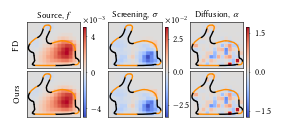

In [7]:
import matplotlib.pyplot as plt 
imsize = 32
cbar_size = 2

pad = 2
imsize1 = 31
imsize2 = 36
cbar_begin_pad = 2
cbar_pad = 2
cbar_end_pad = 15
bb1 = 3
bb2 = 1
o1 = 9
o2 = 11
total_cbar_pad = cbar_begin_pad + cbar_pad + cbar_end_pad
lx = 2 * imsize1  + pad + o1
ly = imsize2 * 3 + 3 * total_cbar_pad  + o2
scale = COLUMN_WIDTH / ly
fig = plt.figure(figsize= (ly * scale , lx * scale))
g = gridspec.GridSpec(lx, ly, figure = fig, wspace = 0.0, hspace=0.0)
ax = fig.add_subplot(g[:,:])
disable_ticks(ax)
plt.setp(ax.spines.values(), color=frame_color)
ax11 = fig.add_subplot(g[0 + o1:imsize1+ o1, 0 + o2 : imsize2+ o2])
ax12 = fig.add_subplot(g[imsize1 + pad+ o1: 2 * imsize1+ o1 + pad, o2: imsize2+ o2])
ax13 = fig.add_subplot(g[ bb1 + o1:, imsize2 + cbar_begin_pad + o2: imsize2 + cbar_pad + cbar_begin_pad+ o2])
plot_fd(ax11, ax12, ax13, fd_source, prb_source)
ax21 = fig.add_subplot(g[0+ o1:imsize1+ o1, imsize2 + total_cbar_pad+ o2 : 2 * imsize2 + total_cbar_pad+ o2])
ax22 = fig.add_subplot(g[imsize1 + pad+ o1: 2 * imsize1 + pad+ o1, imsize2 + total_cbar_pad + o2: 2 * imsize2 + total_cbar_pad+ o2])
ax23 = fig.add_subplot(g[ bb1+ o1 :, 2 * imsize2 + cbar_begin_pad + total_cbar_pad+ o2 : 2 * imsize2 + cbar_pad + cbar_begin_pad + total_cbar_pad+ o2])
plot_fd(ax21, ax22, ax23, fd_screening, prb_screening)
ax31 = fig.add_subplot(g[0+ o1:imsize1+ o1, 2 * imsize2 + 2 * total_cbar_pad+ o2 : 3 * imsize2 + 2 * total_cbar_pad+ o2])
ax32 = fig.add_subplot(g[imsize1 + pad + o1: 2 * imsize1 + pad+ o1, 2 * imsize2 + 2 * total_cbar_pad+ o2 : 3 * imsize2 + 2 * total_cbar_pad+ o2])
ax33 = fig.add_subplot(g[ bb1 + o1:, 3 * imsize2 + cbar_begin_pad + 2 * total_cbar_pad+ o2 : 3 * imsize2 + cbar_pad + cbar_begin_pad + 2 * total_cbar_pad+ o2])
plot_fd(ax31, ax32, ax33, fd_diffusion, prb_diffusion)
ax11.set_ylabel("FD", fontsize =  DEFAULT_FONTSIZE_SMALL)
ax12.set_ylabel("Ours", fontsize = DEFAULT_FONTSIZE_SMALL) 

pad= 4
ax11.set_title(r"Source, $f$", fontsize = DEFAULT_FONTSIZE_SMALL, pad = pad)
ax21.set_title(r"Screening, $\sigma$", fontsize = DEFAULT_FONTSIZE_SMALL, pad = pad)
ax31.set_title(r"Diffusion, $\alpha$", fontsize = DEFAULT_FONTSIZE_SMALL, pad = pad)

save_fig("fd_2D", os.path.join(PATH, "figures"))
#plt.savefig("fd_comparison_variable.pdf", bbox_inches='tight', pad_inches=0.04, dpi=300)